# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [FIFA Players Dataset](https://www.kaggle.com/datasets/maso0dahmed/football-players-data). The original dataset contains a total of 17954 rows and 51 features. The features contain identifying data (eg. name, birth_data), performance metrics (eg. overall_rating, freekick_accuracy) and other player-related statistics (eg. balance, agression, stamina). The dataset was created and sourced by Masood Ahmed and Talha Turab and is free to use in Kaggle. The data was scraped by the authors from [SoFIFA.com](https://sofifa.com/), a FIFA player statistic site spanning the various FIFA games.

The models aim to predict a players overall rating given relevant features. Therefore, this problem classifies as a regression task. 

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the \~18k rows in the dataset represents a FIFA Player. Their 51 columns represent the dataset features. These features include (feature descriptions sourced from the dataset authors, see [here](https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data#:~:text=and%20career%20progressions.-,Features%3A,-name%3A%20Name%20of):

## Features

- **name**: Name of the player.
- **full_name**: Full name of the player.
- **birth_date**: Date of birth of the player.
- **age**: Age of the player.
- **height_cm**: Player's height in centimeters.
- **weight_kgs**: Player's weight in kilograms.
- **positions**: Positions the player can play.
- **nationality**: Player's nationality.
- **overall_rating**: Overall rating of the player in FIFA.
- **potential**: Potential rating of the player in FIFA.
- **value_euro**: Market value of the player in euros.
- **wage_euro**: Weekly wage of the player in euros.
- **preferred_foot**: Player's preferred foot.
- **international_reputation**(1-5): International reputation rating from 1 to 5.
- **weak_foot**(1-5): Rating of the player's weaker foot from 1 to 5.
- **skill_moves**(1-5): Skill moves rating from 1 to 5.
- **body_type**: Player's body type.
- **release_clause_euro**: Release clause of the player in euros.
- **national_team**: National team of the player.
- **national_rating**: Rating in the national team.
- **national_team_position**: Position in the national team.
- **national_jersey_number**: Jersey number in the national team.
- **crossing**: Rating for crossing ability.
- **finishing**: Rating for finishing ability.
- **heading_accuracy**: Rating for heading accuracy.
- **short_passing**: Rating for short passing ability.
- **volleys**: Rating for volleys.
- **dribbling**: Rating for dribbling.
- **curve**: Rating for curve shots.
- **freekick_accuracy**: Rating for free kick accuracy.
- **long_passing**: Rating for long passing.
- **ball_control**: Rating for ball control.
- **acceleration**: Rating for acceleration.
- **sprint_speed**: Rating for sprint speed.
- **agility**: Rating for agility.
- **reactions**: Rating for reactions.
- **balance**: Rating for balance.
- **shot_power**: Rating for shot power.
- **jumping**: Rating for jumping.
- **stamina**: Rating for stamina.
- **strength**: Rating for strength.
- **long_shots**: Rating for long shots.
- **aggression**: Rating for aggression.
- **interceptions**: Rating for interceptions.
- **positioning**: Rating for positioning.
- **vision**: Rating for vision.
- **penalties**: Rating for penalties.
- **composure**: Rating for composure.
- **marking**: Rating for marking.
- **standing_tackle**: Rating for standing tackle.
- **sliding_tackle**: Rating for sliding tackle.




# Section 3. List of requirements

All these libraries serve specific purposes and are commonly used when working with statistics and machine learning projects. Pandas for example allows us to transform data into Dataframe and Series data structures and lets us manipulate the data within really easily. Matplotlib and Seaborn are excellent graphing libraries while Scikit-learn lets us easily train and imrpove AI and machine learning models.

## List of external python libraries
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Scikit-learn

# Section 4. Data preprocessing and cleaning

## 4a. Importing all relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, QuantileTransformer, StandardScaler
import itertools
from collections import Counter

## 4b. Brief overview of the dataset

In [2]:
df = pd.DataFrame()
df = pd.read_csv("./fifa_players.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [3]:
df.head(3)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67


See aggregate metrics of the features. 

In [4]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


## 4c. Cleaning the dataset

First, drop the `potential` column. This is because the goal of the model is to predict a new rating and compare how accurate it is to the `overall_rating`. Since the potential rating of a player is almost 1:1 correlated with this output, the group decided not to use the feature and instead predict only based on other features like skill-related features, etc.

In [5]:
df= df.drop('potential', axis=1)

Checking for null and missing values in our dataset.

In [6]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                  

To clean the dataset, drop all duplicate values using `drop_duplicates` then columns with high null values with `drop_na`. Additionally, drop columns that act as unique identifiers for rows since they will not help the models' training. Since there are a few rows with null `value_euro` or `wage_euro`, these rows will also be dropped.

In [7]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep='first', inplace=False)

# Drop rows with null 'value_euro' or 'wage_euro'
df = df.dropna(subset=["value_euro", "wage_euro"])

# Drop columns with high null values
df = df.drop(columns=["release_clause_euro", "national_team", "national_rating", "national_team_position", "national_jersey_number"])

# Drop identifier columns
df = df.drop(columns=['name', 'full_name', 'birth_date'])

# Reset index to adjust the row indices
df = df.reset_index(drop=True)

new_length = len(df)

# Show how many rows were dropped
str(old_length - new_length) + " rows were dropped"


'255 rows were dropped'

## 4d. Invalid rows

Features that should have values in range of 0 to 100 will be checked for any invalid data. They will be stored in the `skill_100` dataframe.

In [8]:
skill_100 = df[['acceleration', 'jumping', 'aggression', 'dribbling', 'short_passing', 'positioning', 'reactions', 'overall_rating', 'long_shots', 'freekick_accuracy', 'volleys', 'vision', 'crossing', 'curve', 'agility', 'finishing', 'heading_accuracy', 'standing_tackle', 'marking', 'stamina', 'penalties', 'balance', 'strength', 'ball_control', 'interceptions', 'long_passing', 'composure', 'sliding_tackle', 'shot_power', 'sprint_speed']]
skill_100.head(3)

,acceleration,jumping,aggression,dribbling,short_passing,positioning,reactions,overall_rating,long_shots,freekick_accuracy,...,penalties,balance,strength,ball_control,interceptions,long_passing,composure,sliding_tackle,shot_power,sprint_speed
0,91,68,48,97,92,94,95,94,94,94,...,75,95,66,96,22,89,96,26,85,86
1,76,50,46,84,91,84,88,88,89,87,...,67,81,58,91,56,89,88,22,84,73
2,71,83,78,87,86,82,82,88,82,82,...,82,66,87,90,64,90,87,67,90,79


As seen, these features are all well within their 0-100 range, meaning there is no need to prune any invalid data.

In [9]:
invalid_rows = skill_100[(skill_100 < 1).any(axis=1) | (skill_100 > 100).any(axis=1)]

print("Number of invalid rows:", len(invalid_rows))

Number of invalid rows: 0


Next, all columns with values whose ranges are not limited to 0-100 will stored in `not_skill`.

In [10]:
not_skill = df.drop(columns=skill_100.columns)
not_skill.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type'],
      dtype='object')

`not_skill` will be separated into two dataframes containing continuous and categorical data.

In [11]:
not_skill_int = not_skill[['age', 'height_cm', 'weight_kgs', 'value_euro', 'wage_euro']]
not_skill_cat = not_skill.drop(columns=not_skill_int.columns)

In [12]:
# gets outliers outside the percentile range of a certain column
def get_outliers(col, percentile):
    alpha = 1 - percentile
    percentile_5 = df[col].quantile(alpha / 2)
    percentile_95 = df[col].quantile(1 - (alpha/2))
    
    in_range = df[col][(df[col] >= percentile_5) & (df[col] <= percentile_95)]
    outliers = df[col][(df[col] <= percentile_5) | (df[col] >= percentile_95)]
    print(f"Column: {col}, Outliers: {len(outliers)}, Inlier Range: {percentile_5} - {percentile_95}, Value Range: {df[col].min()} - {df[col].max()}")

See outliers and their ranges for continious columns in `not_skill_int`.

In [13]:
for col in not_skill_int.columns:
    get_outliers(col, 0.95)

Column: age, Outliers: 1388, Inlier Range: 18.0 - 35.0, Value Range: 17 - 46
Column: height_cm, Outliers: 3506, Inlier Range: 152.4 - 193.04, Value Range: 152.4 - 205.74
Column: weight_kgs, Outliers: 993, Inlier Range: 62.1 - 89.8, Value Range: 49.9 - 110.2
Column: value_euro, Outliers: 985, Inlier Range: 70000.0 - 15500000.0, Value Range: 10000.0 - 110500000.0
Column: wage_euro, Outliers: 5292, Inlier Range: 1000.0 - 58000.0, Value Range: 1000.0 - 565000.0


The maximum and minimum values for these features aren't human errors, so we will not be removing any outliers and will rely on normalization instead.

Columns in the not_skill_cat dataframe are as follows:

In [14]:
not_skill_cat.columns

Index(['positions', 'nationality', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type'],
      dtype='object')

First, for `body_type` we check to see if there are any values with too little rows in the dataset.

In [15]:
not_skill_cat.body_type.value_counts()

body_type
Normal                 10223
Lean                    6400
Stocky                  1069
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

Rows containing these values will be dropped.

In [16]:
df = df[df['body_type'].isin(["Normal", "Lean", "Stocky"])]

## 4e. Feature Transformation

Look through dataset for multiple representations and to understand the values better

In [17]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        # print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        # print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


Data exported to 'dumps/unique_values.txt'


### Encoding

Data will be binned using the `nationality` column and group rows by their continent. This is since some countries only have a very few amount of rows associated with them, which may introduce imbalance to the dataset.

In [18]:
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 'Angola': 'Africa', 'Antigua & Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Benin': 'Africa', 'Bermuda': 'North America', 'Bolivia': 'South America', 'Bosnia Herzegovina': 'Europe', 'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa', 'Central African Rep.': 'Africa', 'Chad': 'Africa', 'Chile': 'South America', 'China PR': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Curacao': 'North America', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 'DR Congo': 'Africa', 'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa', 'El Salvador': 'North America', 'England': 'Europe', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'FYR Macedonia': 'Europe', 'Faroe Islands': 'Europe', 'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America', 'Guam': 'Oceania', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hong Kong': 'Asia', 'Hungary': 'Europe', 'Iceland': 'Europe', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Korea DPR': 'Asia', 'Korea Republic': 'Asia', 'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Latvia': 'Europe', 'Liberia': 'Africa', 'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Madagascar': 'Africa', 'Mali': 'Africa', 'Malta': 'Europe', 'Mauritania': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe', 'Montenegro': 'Europe', 'Montserrat': 'North America', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa', 'Netherlands': 'Europe', 'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Nigeria': 'Africa', 'Northern Ireland': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Palestine': 'Asia', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Republic of Ireland': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Scotland': 'Europe', 'Senegal': 'Africa', 'Serbia': 'Europe', 'Sierra Leone': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa', 'South Sudan': 'Africa', 'Spain': 'Europe', 'St Kitts Nevis': 'North America', 'St Lucia': 'North America', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia', 'São Tomé & Príncipe': 'Africa', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Togo': 'Africa', 'Trinidad & Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Venezuela': 'South America', 'Vietnam': 'Asia', 'Wales': 'Europe', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}


# Map each nationality to its continent
df['continent'] = df['nationality'].map(country_to_continent)

# Check the result
df = df.drop('nationality', axis=1)

Next, one-hot-encoding will be performed on the player positions. There are 15 total positions in the one-hot-vector.

In [19]:
positions_split = df['positions'].str.get_dummies(sep=',')
positions_split.head(3)

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


Combine these columns with the dataframe and get rid of the `positions` column.

In [20]:
df = pd.concat([df, positions_split], axis=1)
df = df.drop(columns=['positions'])

In [21]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'overall_rating', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'continent', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW',
       'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [22]:
df['continent'].value_counts()

continent
Europe           10401
South America     3038
Asia              1916
Africa            1175
North America      892
Oceania            270
Name: count, dtype: int64

Continents will be label encoded to make them easier to work with for the models.

Continents:  
> 0 - Africa  
1 - Asia  
2 - Europe  
3 - North America  
4 - Oceania  
5 - South America

In [23]:
labels = df['continent'].unique()

In [24]:
le = LabelEncoder()
le.fit(labels)
df["continent"] = le.transform(df["continent"])

See transformed `continent` rows.

In [25]:
df['continent'].value_counts()

continent
2    10401
5     3038
1     1916
0     1175
3      892
4      270
Name: count, dtype: int64

Body types will be label encoded as well.

In [26]:
labels = df['body_type'].unique()

In [27]:
le.fit(labels)
df['body_type'] = le.transform(df["body_type"])

In [28]:
df['body_type'].value_counts()

body_type
1    10223
0     6400
2     1069
Name: count, dtype: int64

Lastly,the same will be done with preferred foot (left, right).

In [29]:
labels = df['preferred_foot'].unique()
le.fit(labels)
df['preferred_foot'] = le.transform(df["preferred_foot"])
df['preferred_foot'].value_counts()

preferred_foot
1    13576
0     4116
Name: count, dtype: int64

### Removing highly correlated features

Highly correlated features will be removed. First we will drop our y, `overall_rating`.

In [30]:
X = df
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

To remove the correlated features, we set our threshhold to be 0.7, where correlations above 0.7 will be dropped. We will first be getting the two most correlated features and comparing both features' correlations with other features in the dataset excluding themselves. The feature with the higher average correlation will be dropped. This continues until there are no more correlations between two features higher than the threshold.

In [31]:
# threshhold for correlaton
thresh = 0.8
fcorr = 1

# if highest correlation between features is less than threshold, break.
while fcorr >= thresh:
    # unstack correlation matrix
    X_corr = X.corr().abs()
    uns = X_corr.unstack().reset_index()
    
    # drop duplicates and identity rows, as well as sort by highest
    uns.drop_duplicates(inplace=True)
    uns.sort_values(0, inplace=True, ascending=False)
    # uns = uns[uns['level_0'] != uns['level_1']]
    uns = uns[uns[0] != 1.0]
    
    # unpack feature 1, feature 2 and corr
    f1, f2, fcorr = uns.iloc[0][:]

    # stop looping if fcorr is lower than threshhold
    if fcorr < thresh:
        break

    # drop f1, f2 from correlations
    f1_corr = pd.DataFrame(X_corr[f1]).drop([f1, f2])
    f2_corr = pd.DataFrame(X_corr[f2]).drop([f1, f2])

    # mean of other correlated features > threshhold
    # f1_s = f1_corr[f1_corr[f1] > thresh].mean().iloc[0]
    # f2_s = f2_corr[f2_corr[f2] > thresh].mean().iloc[0]

    # number of other correlated features > thresh
    # f1_s = len(f1_corr[f1_corr[f1] > thresh])
    # f2_s = len(f2_corr[f2_corr[f2] > thresh])

    # mean of all other correlated features
    f1_s = f1_corr.mean().iloc[0]
    f2_s = f2_corr.mean().iloc[0]

    # drop feature with highest metric
    if f1_s > f2_s:
        X.drop(columns=[f1], inplace=True)
        print(f'Dropping {f1} ({f1_s:.3f}) over {f2} ({f2_s:.3f})')
    else:
        X.drop(columns=[f2], inplace=True)
        print(f'Dropping {f2} ({f2_s:.3f}) over {f1} ({f1_s:.3f})')

Dropping standing_tackle (0.268) over sliding_tackle (0.256)
Dropping ball_control (0.444) over dribbling (0.437)
Dropping interceptions (0.258) over sliding_tackle (0.240)
Dropping acceleration (0.345) over sprint_speed (0.333)
Dropping marking (0.251) over sliding_tackle (0.227)
Dropping dribbling (0.425) over positioning (0.407)
Dropping short_passing (0.396) over long_passing (0.358)
Dropping long_shots (0.386) over shot_power (0.373)
Dropping positioning (0.379) over finishing (0.354)
Dropping volleys (0.347) over finishing (0.342)
Dropping curve (0.356) over freekick_accuracy (0.330)
Dropping value_euro (0.153) over wage_euro (0.141)
Dropping finishing (0.321) over penalties (0.310)


All correations are below 0.7.

In [32]:
new_X = X.corr().abs().unstack().reset_index().sort_values(0, ascending=False)
new_X = new_X[new_X[0] != 1.0]
new_X

,level_0,level_1,0
737,shot_power,penalties,0.798954
983,penalties,shot_power,0.798954
452,heading_accuracy,GK,0.778347
1354,GK,heading_accuracy,0.778347
604,agility,balance,0.775458
...,...,...,...
1560,RB,weak_foot(1-5),0.000476
1748,ST,continent,0.000402
1133,continent,ST,0.000402
164,wage_euro,RM,0.000385


In [33]:
print(f'TOTAL COLUMNS LEFT: {len(X.columns)}, COLUMNS DROPPED: {len(df.columns) - len(X.columns)}')

TOTAL COLUMNS LEFT: 42, COLUMNS DROPPED: 14


In [34]:
df = pd.concat([X, y], axis =1 )

In [35]:
print(df.columns)

Index(['age', 'height_cm', 'weight_kgs', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'crossing', 'heading_accuracy', 'freekick_accuracy',
       'long_passing', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'aggression', 'vision',
       'penalties', 'composure', 'sliding_tackle', 'continent', 'CAM', 'CB',
       'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM', 'RW',
       'RWB', 'ST', 'overall_rating'],
      dtype='object')


### Split train/test data 

This is done to prevent data leakage as a result of the transformation and normalization algorithms below. The algorithms will have to be done to both test/train data independently.

In [36]:
from sklearn.model_selection import train_test_split

df_X = df.drop('overall_rating', axis=1)
df_y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

### Distribution

The distribution of `age`, `height_cm`, `weight_kgs`, `heading_accuracy`, `sprint_speed`, `balance`, `jumping`, `stamina`, `strength`, `vision`, `composure`, `sliding_tackle`, and `wage_euro` will be examined.

In [37]:
name = ['age', 'height_cm', 'weight_kgs', 'heading_accuracy', 'sprint_speed', 'balance', 'jumping', 'stamina', 'strength', 'vision', 'composure', 'sliding_tackle']

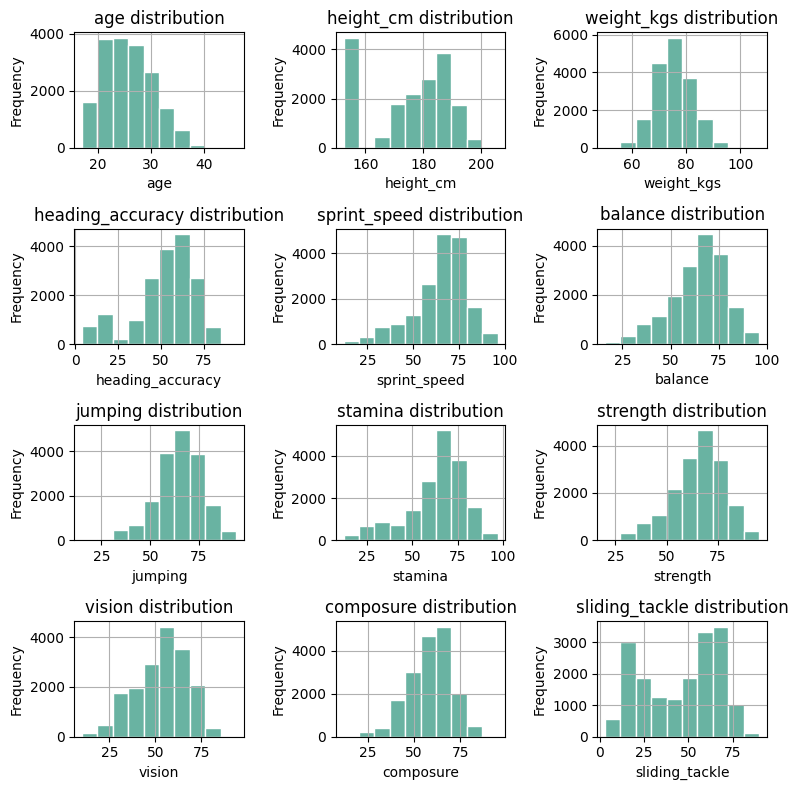

In [38]:
# Initialize a 4x3 charts
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(name):
    
    # Add the histogram
    df[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 4g. Normalization and Standardization

As shown from the distributions above, after performing a quantile transformation for the features in `name`, most features have now become normally distributed. However, for features such as `height_cm`, the distribution after transforming isn't a perfect normal distribution mainly due to the fact that a majority of the data is in the left side of the distribution. 

### Standard Scaling

A Standard Scaler will be used in order to ensure the dataset has a mean of 0 and standard devation of 1.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.fit_transform(X_test)

As the features in the dataset are now all normalized to the same range, models like KNN and Linear Regression can now be done more accurately.  
Just to check, here is the correlations matrix between all data after transformations and scaling. Notice they have the same correlations after transformation.

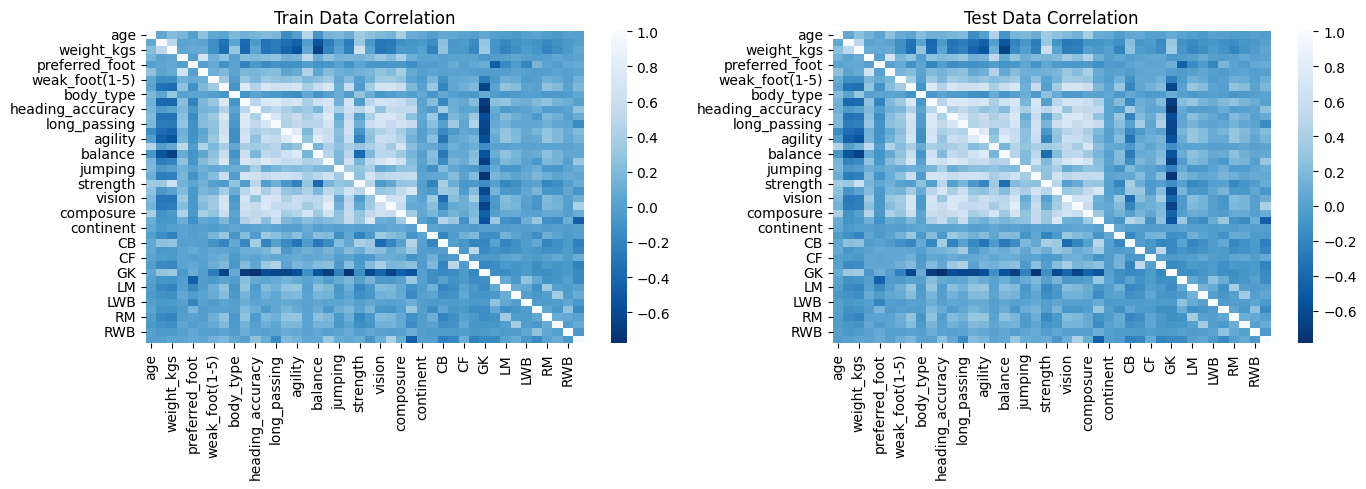

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
axes = axes.flatten()

axes[0].set_title('Train Data Correlation')
axes[1].set_title('Test Data Correlation')

# Train Data Heatmap
correlation_matrix = pd.DataFrame(X_train, columns=X_train.columns).corr()
sns.heatmap(correlation_matrix, fmt=".3f", ax=axes[0], cmap="Blues_r", cbar=True)

# Test Data Heatmap
correlation_matrix = pd.DataFrame(X_test, columns=X_test.columns).corr()
sns.heatmap(correlation_matrix, fmt=".3f", ax=axes[1], cmap="Blues_r", cbar=True)

plt.tight_layout()
plt.show()


# Section 5. Model 1: K-Nearest Neighbors

The KNN Algorithm is a supervised learning algorithm that memorizes the entire dataset and uses it to predict new data. It chooses the K closest instances and gets their average values to predict the new instance (regression). This ML algorithm is considered more 'stupid' than stronger algorithms due to its simplicity, but it is still capable of getting good predictions given a normalized dataset. The rationale for picking this algorithm is the thought "If a player has X rating, a player with similar stats should have around the same rating." 

## 5a. Initial Training

Importing relevant libraries

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

Copy as to not modify the original training and test sets

In [42]:
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()
y_train_knn = y_train.copy()
y_test_knn = y_test.copy()

Setup KNN Classifier and start fitting to the training data. For now, choose as arbitrary K value that does not overfit the data.

In [43]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_knn, y_train_knn)

KNeighborsRegressor(n_neighbors=10)

Test model on training data 

In [44]:
y_pred_train = knn.predict(X_train_knn)
score = knn.score(X_train_knn, y_train_knn)
print("Training set R^2 value:", score)

Training set R^2 value: 0.8660362379783517


The model got a "decent" accuracy on training data, now check using `MSE` ans `RMSE` loss functions

In [45]:
mse = mean_squared_error(y_train_knn, y_pred_train)
rmse = root_mean_squared_error(y_train_knn, y_pred_train)

print("MSE:", mse, "\nRMSE:", rmse)

MSE: 6.463383028333216 
RMSE: 2.54231843566718


Now, test on the test data

In [46]:
y_pred_test = knn.predict(X_test_knn)
score = knn.score(X_test_knn, y_test_knn)
print("Training set R^2 value:", score)

Training set R^2 value: 0.8342131786269296


The model achieved a similar R^2 value on testing data, this means no overfitting or underfitting is occuring. Now check the loss.

In [47]:
mse = mean_squared_error(y_test_knn, y_pred_test)
rmse = root_mean_squared_error(y_test_knn, y_pred_test)

print("MSE:", mse, "\nRMSE:", rmse)

MSE: 8.177341056795706 
RMSE: 2.859605052589554


## 5b. Error analysis

To recap, the model got an coefficient of determination of ~0.86 for the training set and ~0.83 for the testing set. While not too bad, it may be improved with selecting a better K value or distance metric. For now, it is more important to see which features are causing the MSE and RMSE values to spike.

In [48]:
# get variance
losses = (y_train_knn - y_pred_train) ** 2

indexes = losses.sort_values(ascending=False)[:500]
high_err = X_train_knn[X_train_knn.index.isin(indexes.index)]
print(f"Highest Error rows: ({indexes.min()} - {indexes.max()})")

high_err.head(5)

Highest Error rows: (30.25 - 225.0)


,age,height_cm,weight_kgs,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
17443,0.529804,-1.418907,0.642812,1.026771,0.554252,2.332923,0.081743,0.840418,2.269710,0.283734,...,-0.358523,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
16275,1.169664,-1.599520,-0.903888,-0.417631,0.554252,-0.284634,0.081743,-0.477671,0.529935,0.175325,...,-0.358523,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
1504,0.743091,1.109672,-0.066683,-0.417631,0.554252,-0.284634,-1.428579,-1.795761,-1.209840,-1.830242,...,2.789225,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
3473,-0.963204,1.290285,-0.066683,-0.417631,0.554252,-0.284634,-1.428579,-1.795761,-1.209840,-1.938651,...,2.789225,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
7233,-0.749917,1.290285,1.096889,-0.417631,0.554252,-0.284634,-1.428579,-1.795761,-1.209840,-2.155470,...,2.789225,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394


In [49]:
indexes = losses.sort_values(ascending=True)[:500]
low_err = X_train_knn[X_train_knn.index.isin(indexes.index)]
print(f"Lowest Error rows: ({indexes.min()} - {indexes.max()})")

low_err.head(5)

Lowest Error rows: (0.0 - 0.009999999999998864)


,age,height_cm,weight_kgs,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
14307,0.316517,0.567833,0.515103,0.063836,0.554252,-0.284634,0.081743,-0.477671,0.529935,0.554757,...,-0.358523,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
16626,1.596238,0.929059,0.969180,1.989707,0.554252,2.332923,3.102386,0.840418,0.529935,-0.041493,...,-0.358523,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
3647,0.103230,1.109672,-0.066683,-0.369485,0.554252,-0.284634,1.592064,-0.477671,0.529935,0.771575,...,-0.358523,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
12685,-0.536630,-1.599520,-1.599194,-0.176898,0.554252,-0.284634,0.081743,-0.477671,-1.209840,0.771575,...,-0.358523,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,2.494177,-0.236054,-0.134369,2.162659
991,0.316517,-0.154618,-1.287016,0.063836,0.554252,-0.284634,1.592064,0.840418,-1.209840,0.879984,...,-0.358523,-0.360027,-0.40437,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,2.162659


See distributions of highest error data (in green blue) and lowest error data (in red). Each set has 500 rows.

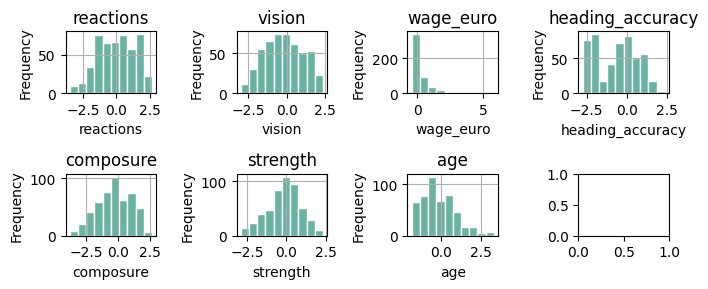

In [50]:
name = ['reactions', 'vision', 'wage_euro', 'heading_accuracy', 'composure', 'strength', 'age']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7, 3))
axes = axes.flatten()
for i, column in enumerate(name):
    high_err[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    axes[i].set_title(f'{column}') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 
plt.tight_layout()
plt.show()

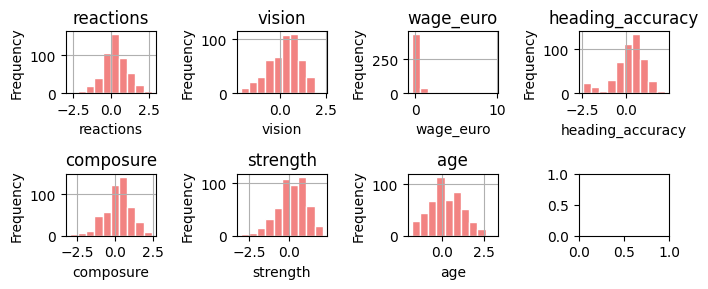

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7, 3))
axes = axes.flatten()
for i, column in enumerate(name):
    low_err[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#f28382' # Color of the bins
                   )
    axes[i].set_title(f'{column}') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 
plt.tight_layout()
plt.show()

One thing that is obvious is that the rows that gave the lowest error are more normally distributed than those with high error. See `reactions`, `vision`, `composure`, `heading_accuracy` and `age`. This indicates that the model is predicting the values that are more average rather than those on either extreme. 



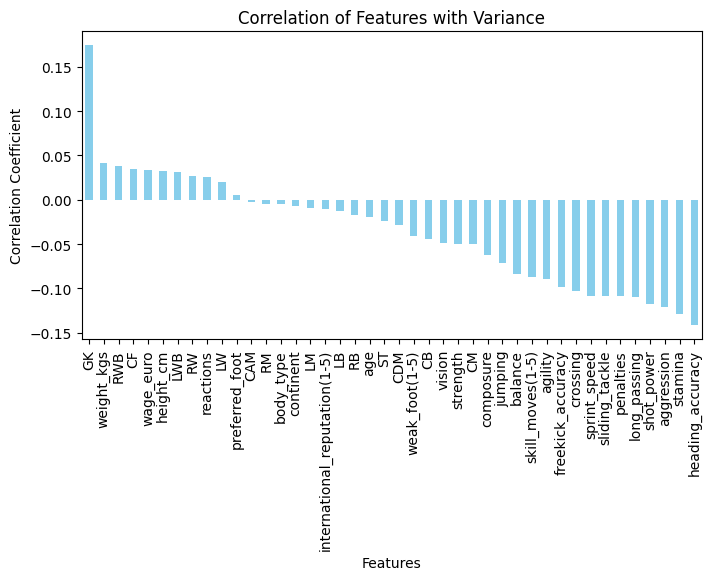

In [52]:
# get variance again
losses = pd.Series((y_train_knn - y_pred_train) ** 2, name="variance")
train_knn_loss = pd.concat([X_train_knn, losses], axis=1)

loss_cm = train_knn_loss.corr()

# Extract only the 'error' correlations
error_correlations = loss_cm["variance"].sort_values(ascending=False)

# Plot as a bar chart
plt.figure(figsize=(8, 4))
error_correlations.drop("variance").plot(kind="bar", color="skyblue")
plt.title("Correlation of Features with Variance")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()


The graph above shows each feature's correlation with variance, where the higher the results the more it contributes to the error, while the lower it is the less it contributes to error. The graph shows that no feature highly correlates with error, with the highest being `GK` with around ~0.15 correlation. A very possible reason for the model not being as fit as it could be is the `curse of dimensionality` where too many features can cause very high model complexity and overfitting. This curse affects KNN negatively due to sparsity of data and weaker distance functions. 

## 5c. Improving model performance

Perform a `GridSearchCV` on the model based on the training set to find out best parameters.

In [53]:
from sklearn.model_selection import GridSearchCV

# Define KNN model
optimal_knn = KNeighborsRegressor()

# Hyperparameter grid
param_grid = {
    'n_neighbors': [1, 5, 7, 10, 15, 20, 30, 50],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=optimal_knn, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=5, verbose=3)

# Fit the model
grid_search.fit(X_train_knn, y_train_knn)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best CV Score:", grid_search.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best CV Score: -2.545401106249522


In [54]:
optimal_knn = grid_search.best_estimator_

optimal_knn.fit(X_train_knn, y_train_knn)

y_pred_train = optimal_knn.predict(X_train_knn)
score = optimal_knn.score(X_train_knn, y_train_knn)

print("(OPTIMAL PARAMS)\nTraining set R^2 value:", score)
mse = mean_squared_error(y_train_knn, y_pred_train)
rmse = root_mean_squared_error(y_train_knn, y_pred_train)
print("MSE:", mse, "\nRMSE:", rmse)

(OPTIMAL PARAMS)
Training set R^2 value: 1.0
MSE: 0.0 
RMSE: 0.0


In [55]:
y_pred_test = optimal_knn.predict(X_test_knn)
score = optimal_knn.score(X_test_knn, y_test_knn)

print("(OPTIMAL PARAMS)\nTesting set R^2 value:", score)
mse = mean_squared_error(y_test_knn, y_pred_test)
rmse = root_mean_squared_error(y_test_knn, y_pred_test)
print("MSE:", mse, "\nRMSE:", rmse)

(OPTIMAL PARAMS)
Testing set R^2 value: 0.8736932779806366
MSE: 6.230007519077715 
RMSE: 2.4959983010967206


Both the train and test sets are doing well. Especially the train set, achieving an R^2 value of 1.0 and 0.0 form the loss functions; which is most likely caused by the `distance` weight function, which is prone to overfitting. In this case however, no overtting has occured. The MSE of the testing set decreased by ~4.5 and the RMSE decreased by ~0.6, which is a success. Additionally, the model fits the testing data better, scoring a ~0.80 R^2 value compared to the previous ~0.74.

# 6. Model 2: Decision Tree 

Import relevant libraries

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

## 6a. Initial model training

Build the DecisionTreeRegressor and fit the training data using default parameters.

In [57]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

Display the features that contribute the most to the dataset. 

In [58]:
importance_scores = dtr.feature_importances_

important_indices = [i for i, score in enumerate(importance_scores) if score > 0.01]

important_features = [X_train.columns[i] for i in important_indices]

print("Important Features:", important_features)

Important Features: ['age', 'wage_euro', 'crossing', 'heading_accuracy', 'reactions', 'shot_power', 'composure', 'sliding_tackle']


Test the model on training and test data.

In [59]:
pred_train = dtr.predict(X_train)
pred_test = dtr.predict(X_test)

Decision Tree perfectly predicts the training set, which results in an expected `MSE` of 0.

In [60]:
print(f"Training MSE: {mean_squared_error(pred_train, y_train)}")
print(f"Training RMSE: {root_mean_squared_error(pred_train, y_train)}")
print(f"R² Score: {r2_score(pred_train, y_train)}")

Training MSE: 0.0
Training RMSE: 0.0
R² Score: 1.0


Relatively high values for `MSE` and `RMSE`, and lower `R² score` suggest that the model exhibits high variance.

In [61]:
print(f"Test MSE: {mean_squared_error(pred_test, y_test)}")
print(f"Test RMSE: {root_mean_squared_error(pred_test, y_test)}")
print(f"R² Score: {r2_score(pred_test, y_test)}")

Test MSE: 9.62277479513987
Test RMSE: 3.1020597665325327
R² Score: 0.803717908509876


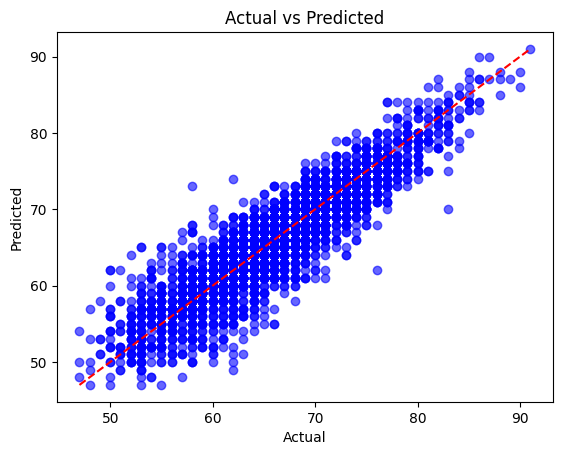

In [115]:
plt.scatter(y_test, pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## 6b. Error Analysis

While the metrics for the training set are expected, the metrics for the testing could be improved. To recall, the `MSE` for the testing data is ~`9.62` and the `R² score` is ~`0.80`. While the default model performed reasonably well with these metrics, there is still room for improvement in performance and robustness. Visualizations are displayed to check where improvements can be made:

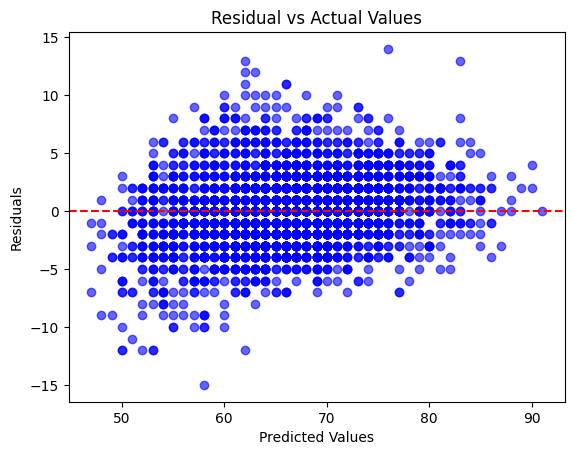

In [116]:
residuals = y_test - pred_test
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Actual Values')
plt.show()

The residual plot above shows that the model's predictions are relatively accurate, having a mostly ellipsoid distribution around the center, displaying homoscedasticity. This suggests that the variance of errors is constant across all of the independent variables.

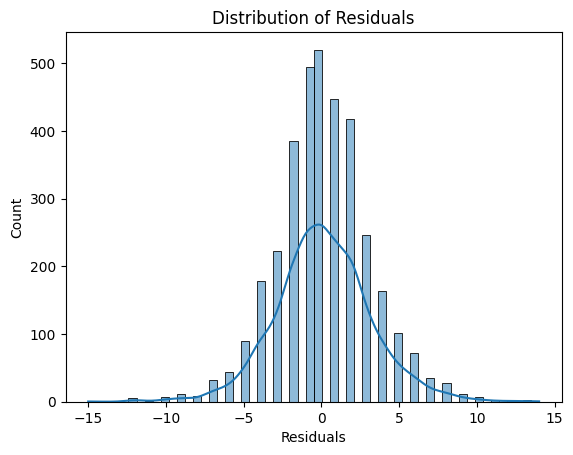

In [64]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

Given the residual distribution above, it resembles a normal disstribution, further supporting that the model is predicting the rating of a player properly.

## 6c. Improving model performance

As mentioned, the model still has room to improve. A Grid Search along with hyperparameter tuning will be used to find the ideal model.

### Hyperparameter tuning

In [66]:
# Define the parameter grid for the Decision Tree Regressor
param_grid = {        
   'max_depth': [20, 30, 50, 75],                 
   'max_features': [None, "sqrt", "log2"], 
   'min_samples_leaf': [4, 8, 10, 20], 
   'min_samples_split': [30, 50, 75, 100]
}

GridSearch is used to aid in hyperparameter tuning.

In [67]:
gsc_df = GridSearchCV(
                        estimator=dtr, 
                        param_grid=param_grid,
                        cv=5,
                        scoring="neg_root_mean_squared_error", 
                        verbose=2
                     )

Fit the traiing data using Grid Search with the parameter grid.

In [68]:
gsc_df.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=30; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=30; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=30; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=30; total time=   0.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=30; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=50; total time=   0.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=50; total time=   0.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=50; total time=   0.2s
[CV] END max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=50; total time=   0.2s
[CV] END m

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [20, 30, 50, 75],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 8, 10, 20],
                         'min_samples_split': [30, 50, 75, 100]},
             scoring='neg_root_mean_squared_error', verbose=2)

Display the best parameters.

In [69]:
gsc_df.best_params_

{'max_depth': 75,
 'max_features': None,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

Create a Decision Tree Regressor with the best parameters

In [70]:
best_dtr = gsc_df.best_estimator_

Train the estimator on the data:

In [71]:
best_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=75, min_samples_leaf=10, min_samples_split=50)

Display the features that contribute the most to the dataset. 

In [72]:
importance_scores = best_dtr.feature_importances_

important_indices = [i for i, score in enumerate(importance_scores) if score > 0.01]

# Map indices to column names
important_features = [X.columns[i] for i in important_indices]

print("Important Features:", important_features)

Important Features: ['age', 'wage_euro', 'reactions', 'composure', 'sliding_tackle']


Get the predictions, mean squared error, root mean squared error, and R^2 Score.

In [73]:
pred_y_train = best_dtr.predict(X_train)

print(f"Training MSE: {mean_squared_error(pred_y_train, y_train)}")
print(f"Training RMSE: {root_mean_squared_error(pred_y_train, y_train)}")
print(f"R² Score: {r2_score(pred_y_train, y_train)}")

Training MSE: 4.078110815599612
Training RMSE: 2.019433290703016
R² Score: 0.9076705828514936


### Testing phase

In [74]:
pred_y_test = best_dtr.predict(X_test)

print(f"Test MSE: {mean_squared_error(pred_y_test, y_test)}")
print(f"Test RMSE: {root_mean_squared_error(pred_y_test, y_test)}")
print(f"R² Score: {r2_score(pred_y_test, y_test)}")

Test MSE: 6.635131892992991
Test RMSE: 2.575874976196048
R² Score: 0.8497165756355765


Notice the important features have been narrowed down from 9 to 6. While the training set seems to perform worse, it allows the test set to be improved. The `MSE` of the test set decreased by ~`2.99`, `RMSE` by ~`0.47`, and `R2 score` increased by `0.03`. Let's compare the results by looking at the actual vs predicted values, and looking at the residuals.

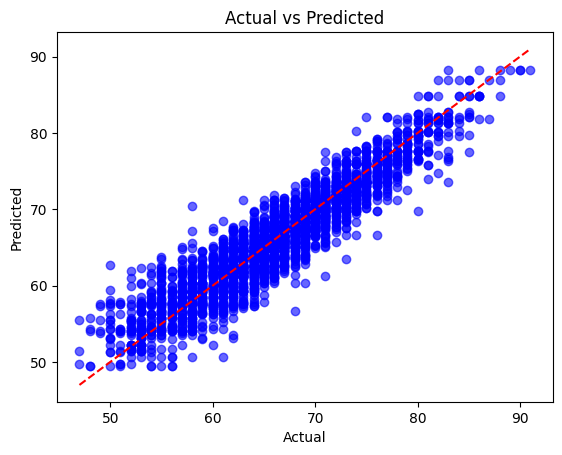

In [75]:
plt.scatter(y_test, pred_y_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

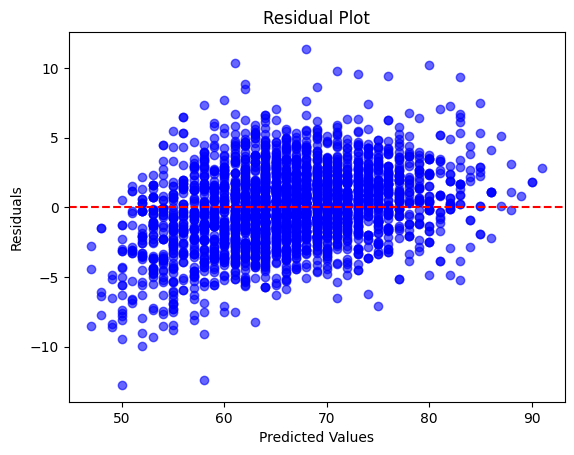

In [76]:
residuals = y_test - pred_y_test
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

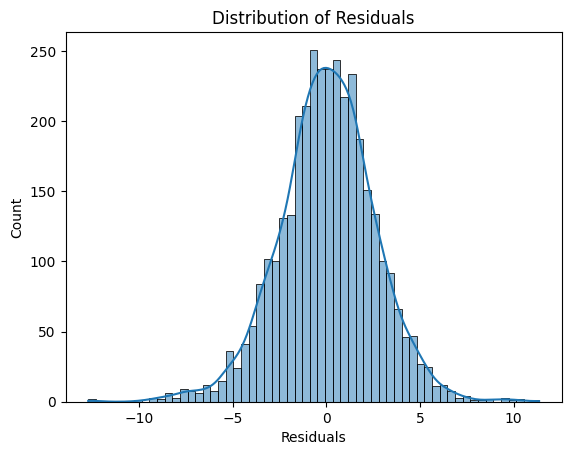

In [77]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

The scatter plots show the values closer to the regression line in both plots. Additionally, the maximum count (y-value) of the histogram plot of the distribution of residuals has halved, which suggests fewer residuals at the most common error level. 

# 7. Model 3: Linear Regression

## 7a. Initial model training

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

### Testing the model without using a ridge or lasso regression

In [80]:
X_train

,age,height_cm,weight_kgs,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,...,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
7315,-0.323344,0.929059,0.969180,-0.417631,0.554252,-0.284634,0.081743,-1.795761,0.529935,-1.938651,...,2.789225,-0.360027,-0.404370,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
2079,0.743091,-1.418907,0.131975,-0.225044,-1.804234,-0.284634,-1.428579,-0.477671,-1.209840,0.934188,...,-0.358523,2.777571,-0.404370,-0.235553,7.597772,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
3719,-0.963204,0.929059,0.131975,-0.417631,-1.804234,-0.284634,0.081743,0.840418,0.529935,0.446348,...,-0.358523,2.777571,-0.404370,4.245333,-0.131618,-0.360402,-0.400934,4.236325,-0.134369,-0.462394
6764,-1.389778,0.025995,-0.194393,-0.321338,0.554252,-0.284634,0.081743,-0.477671,0.529935,0.066916,...,-0.358523,-0.360027,-0.404370,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
12456,1.169664,0.567833,-0.194393,-0.321338,0.554252,-0.284634,0.081743,0.840418,2.269710,0.934188,...,-0.358523,2.777571,-0.404370,-0.235553,-0.131618,2.774677,-0.400934,-0.236054,-0.134369,-0.462394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,-0.110057,-1.418907,-0.322102,-0.321338,0.554252,-0.284634,0.081743,-0.477671,-1.209840,-0.475129,...,-0.358523,-0.360027,-0.404370,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,2.162659
9375,-1.603065,-1.599520,-1.471485,-0.321338,-1.804234,-0.284634,1.592064,0.840418,-1.209840,-0.420925,...,-0.358523,-0.360027,2.472981,4.245333,-0.131618,-0.360402,-0.400934,4.236325,-0.134369,2.162659
7294,0.103230,0.567833,0.969180,-0.273191,0.554252,-0.284634,0.081743,-1.795761,0.529935,-1.776038,...,2.789225,-0.360027,-0.404370,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394
7296,-0.323344,-0.515843,-0.322102,-0.369485,-1.804234,-0.284634,0.081743,-0.477671,0.529935,0.717370,...,-0.358523,2.777571,-0.404370,-0.235553,-0.131618,-0.360402,-0.400934,-0.236054,-0.134369,-0.462394


Initialize the model

In [81]:
lin_reg = LinearRegression()

Fitting the linear regression model

In [82]:
lin_reg.fit(X_train, y_train)

LinearRegression()

Predicting y-values using the training data

In [83]:
y_pred_train = lin_reg.predict(X_train)

Computing the evaluation metric on the basic linear regression model uisng the training data

In [84]:
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse_train}')
print(f'Root Mean Squared Error: {rmse_train}')

Mean Squared Error: 6.487972351182167
Root Mean Squared Error: 2.547149848591984


Testing the model using the testing data and computing the evaluation metric on the basic linear regression model using it

In [85]:
y_pred_test = lin_reg.predict(X_test)

In [86]:
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)



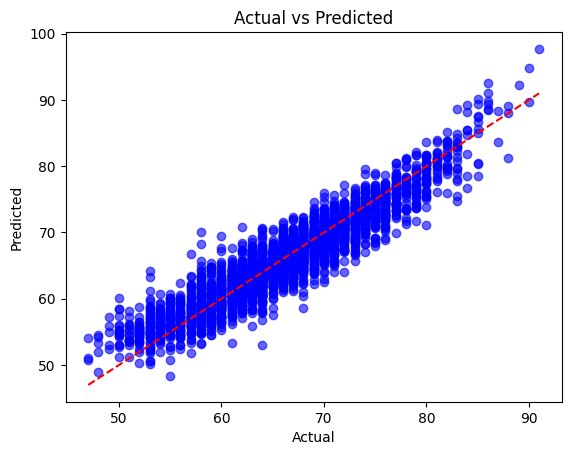

In [87]:
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [88]:
r2 = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'Root Mean Squared Error (Train): {rmse_train}')
print(f'Root Mean Squared Error (Test): {rmse_test}')
print(f'R² Score (Train): {r2}')
print(f'R² Score (Testing): {r2_test}')

Mean Squared Error (Train): 6.487972351182167
Mean Squared Error (Test): 6.412636055840811
Root Mean Squared Error (Train): 2.547149848591984
Root Mean Squared Error (Test): 2.5323183164524976
R² Score (Train): 0.8655265856523221
R² Score (Testing): 0.8699906802301358


## 7b. Error Analysis

Given the metrics provided by the basic model, a MSE of 8.1583 is attained with an R² score of 83.4599.

Given that, by collecting the RMSE of the testing data, we can conclude that on average, the prediction of the model will deviate by `2.86` units from the actual value

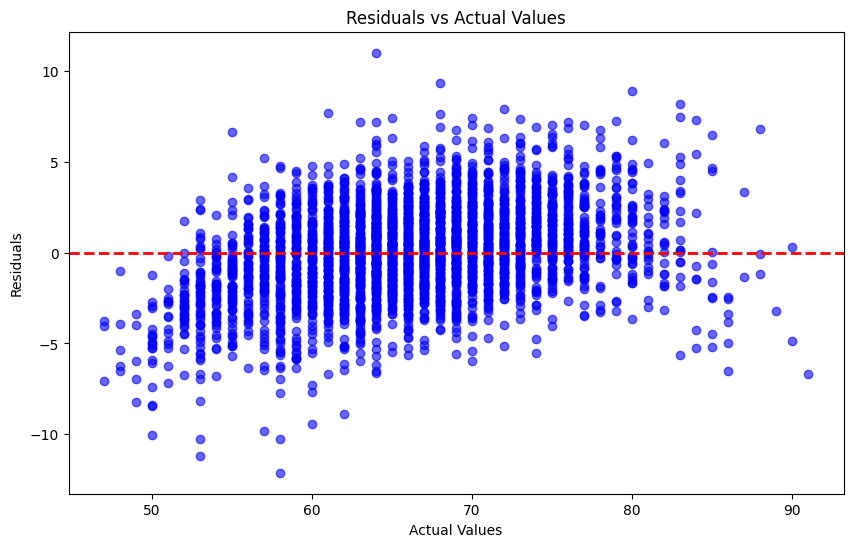

In [89]:
y_pred = lin_reg.predict(X_test)
residuals = y_test - y_pred

# Create a DataFrame to analyze residuals
residuals_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.show()

The graph above shows the residuals with respect to their actual values. The `y-axis` shows how much the predicted value deviates from the actual value while the `x-axis` shows the actual value. Given that points closer to `0` would mean a perfect prediction

By examining the graph, it appears that the model's predictions are more accurate for values near the center, while there are occasions where it undervalues outliers.

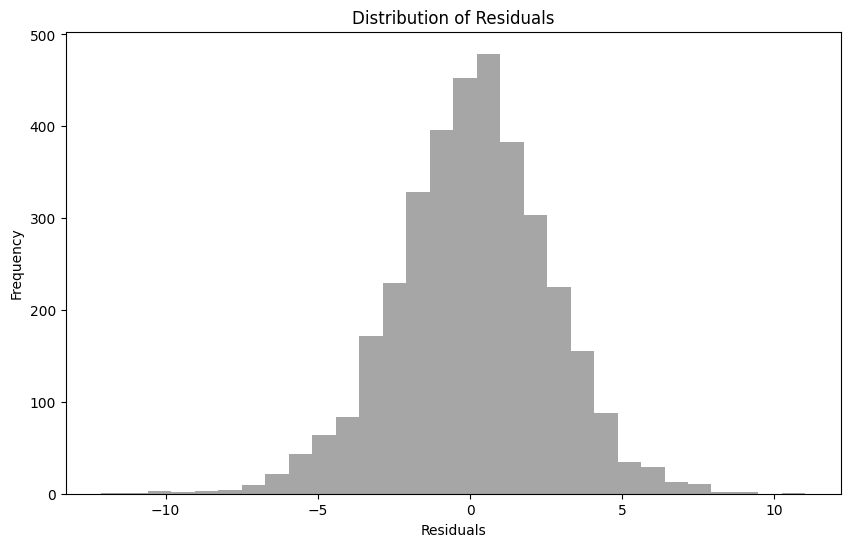

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='gray', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

By looking at the distribution of the residuals, it seems that the distribution is normally distributed and centered around zero; this could mean that on average the model is predicting the rating of a player properly

In [91]:
high_error_cases = residuals_df.sort_values(by='Residual', key=abs, ascending=False).head(5)
print("Top 5 High Error Cases:\n", high_error_cases)


Top 5 High Error Cases:
       Actual  Predicted   Residual
6510      58  70.124806 -12.124806
5198      53  64.189284 -11.189284
9612      64  52.983130  11.016870
5206      53  63.287667 -10.287667
4262      58  68.253215 -10.253215


In [92]:
high_error_indexes = [4896, 9612, 4776, 6510, 5652]

# Extract corresponding rows from X_test
high_error_cases = X_test.loc[high_error_indexes]

pd.set_option('display.max_columns', None)

# Display the high error cases
high_error_cases

,age,height_cm,weight_kgs,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,heading_accuracy,freekick_accuracy,long_passing,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,aggression,vision,penalties,composure,sliding_tackle,continent,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
4896,-1.395145,0.013452,-1.020689,-0.41492,0.536076,-0.289241,0.084321,-0.464746,0.497868,-0.622254,-0.750896,0.029429,-0.099609,-0.051261,-0.024963,0.448648,-0.277405,-0.650373,-0.497487,-0.509198,-1.858354,-0.737382,-0.458889,-0.081924,-0.498207,0.027991,-0.262210,-0.356972,-0.512422,-0.422479,-0.148143,2.024703,-0.362483,-0.352935,-0.406093,-0.243441,-0.127945,-0.358981,-0.388451,-0.230811,-0.131325,-0.466268
9612,1.566207,0.925431,2.571902,-0.41492,0.536076,-0.289241,-1.415240,-1.755748,0.497868,-1.974267,-2.342846,-1.677917,-2.169047,-2.865927,-2.250442,-2.625225,-2.181498,-1.918766,-0.927975,-2.901524,-2.257911,-1.720019,-2.082472,-2.293677,-2.653757,-1.518374,-1.714416,-0.356972,-0.512422,-0.422479,-0.148143,-0.493900,2.758751,-0.352935,-0.406093,-0.243441,-0.127945,-0.358981,-0.388451,-0.230811,-0.131325,-0.466268
4776,-1.606671,0.925431,0.616090,-0.41492,0.536076,-0.289241,-1.415240,-0.464746,-1.229538,-0.946737,-0.694040,-0.596598,-0.616968,-0.721419,-0.901667,-0.978508,-0.982624,-1.342224,-0.583585,-0.446242,-0.180213,-0.159360,-0.529479,-1.282590,-1.274205,0.121710,-0.262210,-0.356972,1.951518,2.366984,-0.148143,-0.493900,-0.362483,-0.352935,-0.406093,-0.243441,-0.127945,-0.358981,-0.388451,-0.230811,-0.131325,-0.466268
6510,2.200782,0.925431,1.503834,-0.41492,0.536076,-0.289241,-1.415240,-1.755748,0.497868,-1.974267,-2.229135,-1.677917,-1.328338,-1.257546,-0.159841,0.229086,-0.841581,-1.918766,0.535683,-2.209009,0.379167,-1.026393,-1.164794,-0.650660,0.708901,-1.424654,-0.262210,-0.356972,-0.512422,-0.422479,-0.148143,-0.493900,2.758751,-0.352935,-0.406093,-0.243441,-0.127945,-0.358981,-0.388451,-0.230811,-0.131325,-0.466268
5652,-1.395145,1.290222,1.753512,-0.41492,0.536076,-0.289241,-2.914801,-1.755748,0.497868,-1.649784,-2.513412,-1.507182,-2.233717,-1.793673,-2.924829,-4.162162,-2.534107,-1.976420,-2.908217,-1.579449,-1.298974,-1.604414,-2.082472,-1.535361,-3.429755,-1.705812,0.463894,-0.356972,-0.512422,-0.422479,-0.148143,-0.493900,2.758751,-0.352935,-0.406093,-0.243441,-0.127945,-0.358981,-0.388451,-0.230811,-0.131325,-0.466268


Judging by the errors, 3/5 of the players were goalkeepers and since there is not many of them, the model is not well equipped to handle players who are goalkeepers

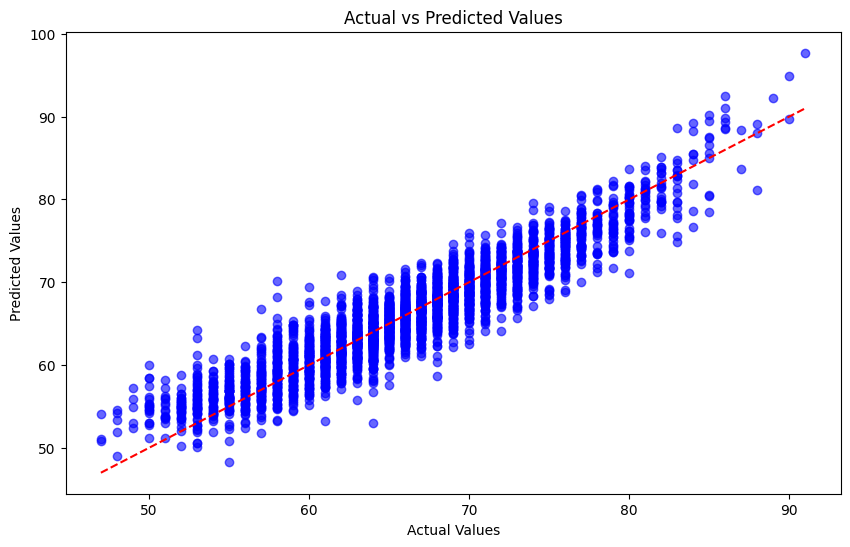

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


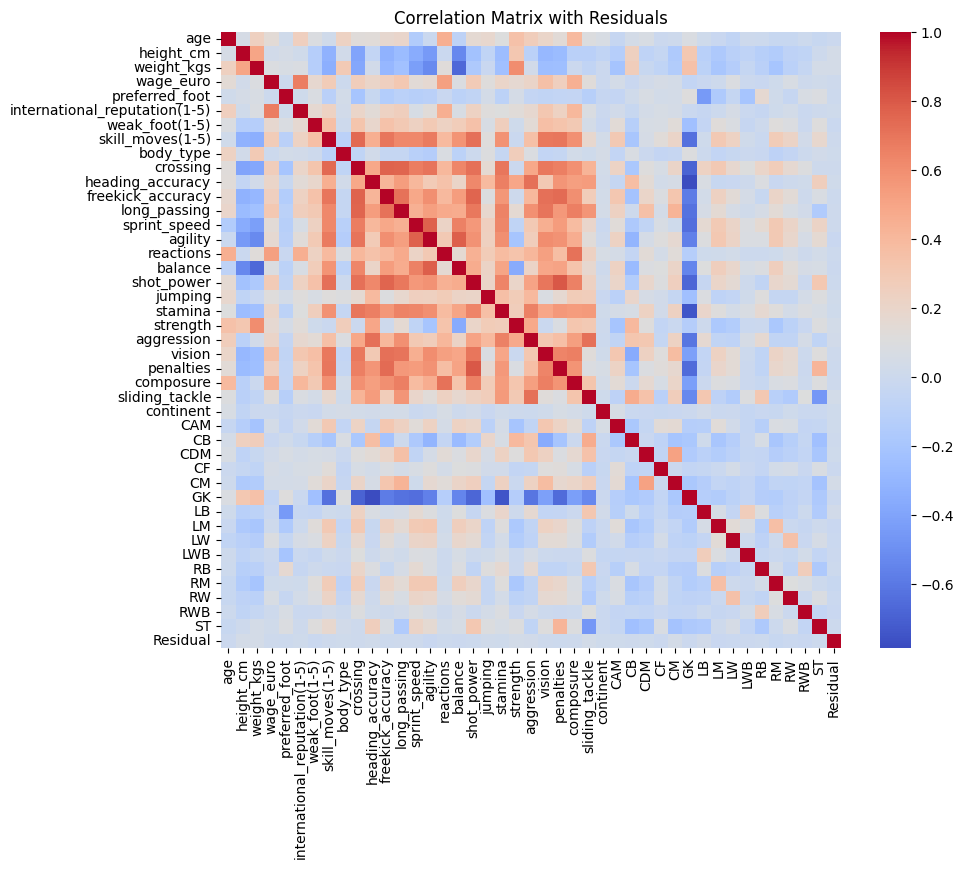

In [94]:
# Compute the correlation matrix
correlation_matrix = pd.concat([X_test, pd.Series(residuals, name='Residual')], axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix with Residuals")
plt.show()

## 7c. Improving model performance

Using regularization techniques to reduce impact from correlated features

`ridge` regression

Mean Squared Error (Train): 6.487973409116632
Mean Squared Error (Test): 6.4126330393207
Root Mean Squared Error (Train): 2.5471500562622205
Root Mean Squared Error (Test): 2.5323177208479786
R² Score (Train): 0.8699907413868465
R² Score (Testing): 0.8699906802301358


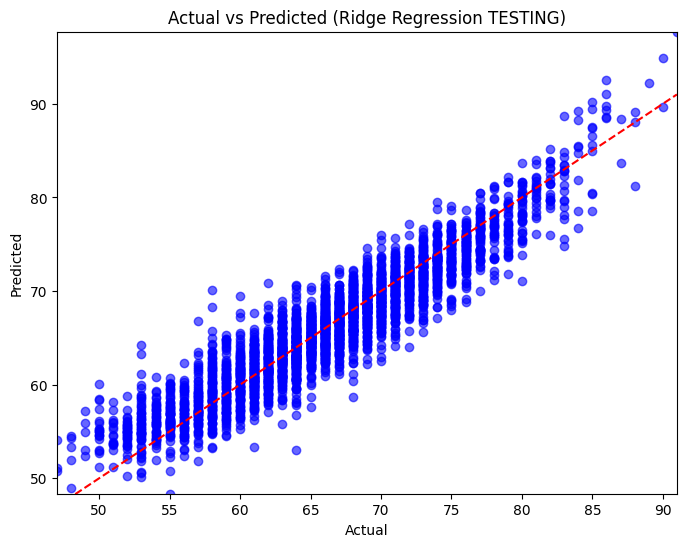

In [95]:
from sklearn.linear_model import Ridge
# Initialize and fit the Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred)

# Print performance metrics
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')
print(f'Root Mean Squared Error (Train): {rmse_train}')
print(f'Root Mean Squared Error (Test): {rmse_test}')
print(f'R² Score (Train): {r2}')
print(f'R² Score (Testing): {r2_test}')

# Visualize Actual vs Predicted for Testing
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlim(y_test.min(), y_test.max())  # Set the same range for both axes
plt.ylim(y_pred_test.min(), y_pred_test.max())  # Set the same range for both axes
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression TESTING)')
plt.show()


In [96]:
print("Feature Coefficients:", ridge_reg.coef_)

Feature Coefficients: [ 2.25305017e-01  1.12377690e-01  1.31480252e-01  8.05435651e-01
 -1.38287912e-01  1.00272265e-01  1.14473831e-01  9.78896268e-01
  6.69781365e-04  3.24558772e-01  1.10101962e+00 -1.22079111e-01
  7.66789620e-01  6.70469189e-01  4.11270295e-01  2.90731672e+00
 -1.25735555e-01  4.71423679e-01  1.41545590e-02  4.51895001e-01
  4.20680692e-01  8.72888946e-03  2.21002291e-01  1.31124666e-01
  1.22244250e+00  5.45256696e-01  1.87170728e-01  9.53328231e-02
  6.21898143e-01 -5.91516298e-02 -2.74394742e-02 -6.27214956e-01
  4.12138193e+00 -3.23904508e-01  7.19538481e-02  6.79914284e-02
 -4.25176269e-02 -2.19321846e-01  5.64560964e-02  4.07207427e-02
  8.61220996e-03 -1.30063212e-01]


`lasso` regression

Mean Squared Error (Train): 11.541
Mean Squared Error (Test): 11.683
Root Mean Squared Error (Train): 3.397
Root Mean Squared Error (Test): 3.418
R² Score (Train): 0.761
R² Score (Test): 0.763


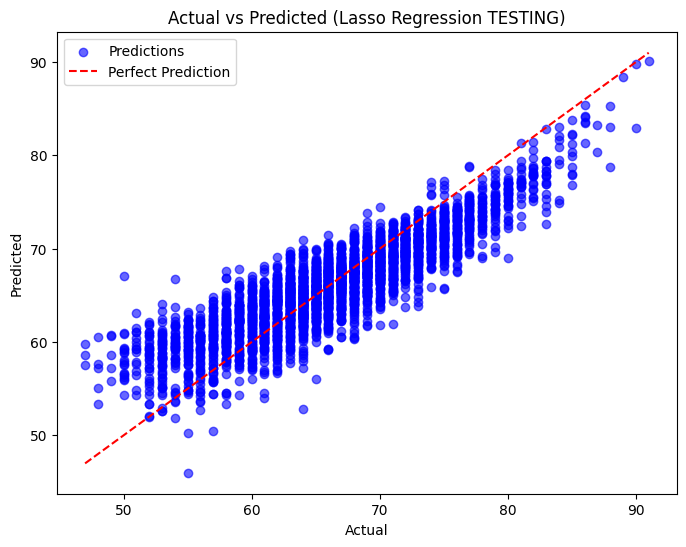

In [97]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize and fit the Lasso regression model
lasso_reg = Lasso(alpha=1.0)  
lasso_reg.fit(X_train, y_train)

# Predict on the training and test sets
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

# Print performance metrics
print(f'Mean Squared Error (Train): {mse_train:.3f}')
print(f'Mean Squared Error (Test): {mse_test:.3f}')
print(f'Root Mean Squared Error (Train): {rmse_train:.3f}')
print(f'Root Mean Squared Error (Test): {rmse_test:.3f}')
print(f'R² Score (Train): {r2_train:.3f}')
print(f'R² Score (Test): {r2_test:.3f}')

# Visualize Actual vs Predicted (Testing)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression TESTING)')
plt.legend()
plt.show()

### Hyperparameter tuning

Using a gridsearch to determine the best regularization technique and its best alpha

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import Ridge, Lasso

# Define the parameter grid for Ridge and Lasso
param_grid = {
    "alpha": [ 0.01, 0.1, 1, 10, 100]  # Range of regularization strengths
}

# Create Ridge and Lasso regressors
ridge = Ridge()
lasso = Lasso()

# Use MSE as the scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform Grid Search for Ridge
ridge_grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring=mse_scorer, cv=5)
ridge_grid_search.fit(X_train, y_train)

# Perform Grid Search for Lasso
lasso_grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=mse_scorer, cv=5)
lasso_grid_search.fit(X_train, y_train)

# Extract best models and parameters
best_ridge = ridge_grid_search.best_estimator_
best_lasso = lasso_grid_search.best_estimator_
best_ridge_params = ridge_grid_search.best_params_
best_lasso_params = lasso_grid_search.best_params_

# Evaluate both models on the test set
ridge_y_pred_test = best_ridge.predict(X_test)
lasso_y_pred_test = best_lasso.predict(X_test)
ridge_mse_test = mean_squared_error(y_test, ridge_y_pred_test)
lasso_mse_test = mean_squared_error(y_test, lasso_y_pred_test)

# Evaluate both models on the training set
ridge_y_pred_train = best_ridge.predict(X_train)
lasso_y_pred_train = best_lasso.predict(X_train)
ridge_mse_train = mean_squared_error(y_train, ridge_y_pred_train)
lasso_mse_train = mean_squared_error(y_train, lasso_y_pred_train)

# Print results
print("Ridge Regression:")
print(f"Best Parameters: {best_ridge_params}")
print(f"Test MSE: {ridge_mse_test:.3f}")
print(f"Train MSE: {ridge_mse_train:.3f}")

print("\nLasso Regression:")
print(f"Best Parameters: {best_lasso_params}")
print(f"Test MSE: {lasso_mse_test:.3f}")
print(f"Train MSE: {lasso_mse_train:.3f}")

# Select the best model
if ridge_mse_test < lasso_mse_test:
    print("\nBest Model: Ridge")
    best_model = best_ridge
else:
    print("\nBest Model: Lasso")
    best_model = best_lasso

# Final metrics for the best model on test set
final_y_pred_test = best_model.predict(X_test)
final_rmse_test = np.sqrt(mean_squared_error(y_test, final_y_pred_test))
final_r2_test = best_model.score(X_test, y_test)

# Final metrics for the best model on training set
final_y_pred_train = best_model.predict(X_train)
final_rmse_train = np.sqrt(mean_squared_error(y_train, final_y_pred_train))
final_r2_train = best_model.score(X_train, y_train)

print(f"\nFinal Model Performance on Test Set:")
print(f"RMSE: {final_rmse_test:.3f}")
print(f"MSE: {final_rmse_test ** 2:.3f}")
print(f"R²: {final_r2_test:.3f}")

print(f"\nFinal Model Performance on Training Set:")
print(f"RMSE: {final_rmse_train:.3f}")
print(f"MSE: {final_rmse_train ** 2:.3f}")
print(f"R²: {final_r2_train:.3f}")


Ridge Regression:
Best Parameters: {'alpha': 1}
Test MSE: 6.413
Train MSE: 6.488

Lasso Regression:
Best Parameters: {'alpha': 0.01}
Test MSE: 6.424
Train MSE: 6.496

Best Model: Ridge

Final Model Performance on Test Set:
RMSE: 2.532
MSE: 6.413
R²: 0.870

Final Model Performance on Training Set:
RMSE: 2.547
MSE: 6.488
R²: 0.866


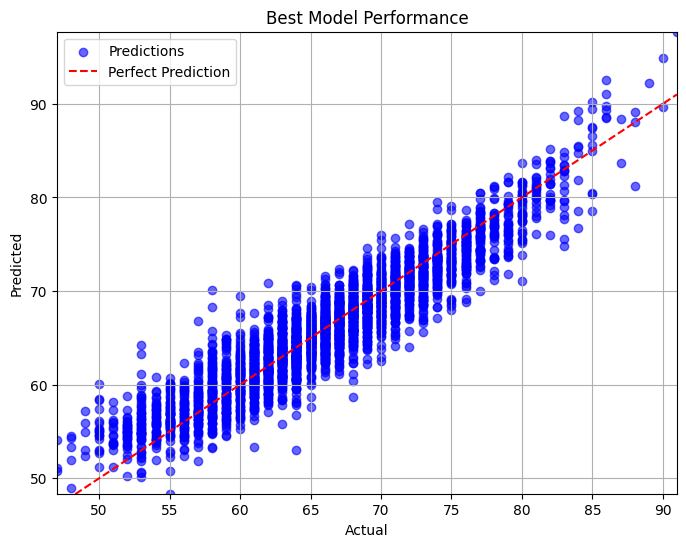

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_y_pred_test, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Best Model Performance')
plt.xlim(y_test.min(), y_test.max())  # Set the same range for both axes
plt.ylim(y_pred_test.min(), y_pred_test.max())  # Set the same range for both axes
plt.grid(True)  # Add grid lines for better visual interpretation
plt.legend()
plt.show()


Features with respect to their coefficients

In [100]:
coef = best_model.coef_
vals = []

# Create a list of feature and coefficient pairs
for f, c in zip(X_train.columns, best_model.coef_):
    vals.append((f, c))

# Sort the list by the coefficient value (c)
vals_sorted = sorted(vals, key=lambda x: x[1], reverse=True)

# Create a formatted list with feature names and coefficients
vals_sorted_formatted = [f"Feature {f}: {c}" for f, c in vals_sorted]

# Print the sorted list
for item in vals_sorted_formatted:
    print(item)


Feature GK: 4.121381927655624
Feature reactions: 2.9073167223212897
Feature composure: 1.222442495421471
Feature heading_accuracy: 1.10101961850065
Feature skill_moves(1-5): 0.9788962677586124
Feature wage_euro: 0.8054356514056041
Feature long_passing: 0.7667896200842471
Feature sprint_speed: 0.6704691886346921
Feature CB: 0.621898142640719
Feature sliding_tackle: 0.5452566961779444
Feature shot_power: 0.47142367936109353
Feature stamina: 0.4518950012939076
Feature strength: 0.42068069193108587
Feature agility: 0.4112702948975825
Feature crossing: 0.32455877233728253
Feature age: 0.22530501727745222
Feature vision: 0.2210022913288836
Feature continent: 0.18717072830065482
Feature weight_kgs: 0.13148025191083673
Feature penalties: 0.1311246662520361
Feature weak_foot(1-5): 0.11447383136347343
Feature height_cm: 0.11237768965897169
Feature international_reputation(1-5): 0.10027226541460357
Feature CAM: 0.09533282311348104
Feature LM: 0.07195384809599192
Feature LW: 0.06799142842891807
Fe

# Section 8. Model Performance Summary

## 8a. K-Nearest Neighbors

Through Grid Search, optimal `n_neighbors`, `metric` and `weights` parameters were found for the KNN model. 
  
`n_neighbors`: number of neighbors   
`metric`: distance metric to use, ex. Minkowski, Manhattan  
`weights`: weight function


`param_grid = {
    'n_neighbors': [1, 5, 7, 10, 15, 20, 30, 50],  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'cosine']  
}`


ORIGINAL PARAMETERS:  
`n_neighbors`: 10  
`weights`: uniform  
`metric`: minkowski

OPTIMAL PARAMETERS:  
`n_neighbors`: 10  
`weights`: distance  
`metric`: manhattan

The arbitrary value for k used in the original turned out to be the best k value for the model. This means that getting the average rating for the 10 closest neighbors gives the best predictions. For the weight function, a weighted KNN model was better than a uniform one possibly because some features affected the output much more than others. The reason why manhattan distance function may have been better is due to its effectiveness with high-dimensional data and its robustness to outliers (which there are many). 

__Loss Metrics without tuning:__  
Train R^2: 0.87   
Train MSE: 6.46   
Train RMSE: 2.54  

Test R^2: 0.83    
Test MSE: 8.18  
Test RMSE: 2.86  


__Loss Metrics with tuning:__  
Train R^2: 1.00  
Train MSE: 0.00  
Train RMSE: 0.00   

Test R^2: 0.87  
Test MSE: 6.23
Test RMSE: 2.50   


__Improvement on testing data:__  
R^2: +0.04 (4.8% improvement)
MSE: -1.95 (23.84% improvement)  
RMSE: -0.36 (12.58% improvement)  

## 8b. Decision Tree Regressor

The Decision Tree Regressor is a supervised learning algorithm that uses a tree-like structure and recursive partitioning based on splitting criteria. The default model performed well already, but given the relatively high MSE and low R2 score, improvements can be made.

Without hyperparameter tuning, the default values for the parameters of the Decision Tree Regressor were used:
- `max_depth = None`
- `max_features = None`
- `min_samples_leaf = 1`
- `min_samples_split = 2`



Through hyperparameter tuning via Grid Search, the optimal values for the Decision Tree Regressor can be found, namely:
- `max_depth`: a tree with a higher max depth allows the tree to grow deep and balances complexity without overfitting. 
- `max_features`: having no restrictions and allowing the tree to consider all features benefit the model by having access to all features. It allows flexibility and potentially leads to a better fit on the data.
- `min_samples_leaf`: higher values helps reduce overfitting by ensuring that the model doesn't create leaves based on a small subset of data that might be noise or outliers.
- `min_samples_split`: helps control model complexity by limiting the tree's ability to make overly specific splits. It ensures that only splits which affect a significant portion of the data are made, which reduces the likelihood of overfitting and results in a simpler model with better generalization to unseen data.

__Initial Model Performance Metrics:__  
Train MSE: 0.0    
Train RMSE: 0.0  
Train R^2: 1.0  
Test MSE: 9.62
Test RMSE: 3.10  
Test R^2: 0.80

__Final Model Performance Metrics:__  
Train MSE: 4.60   
Train RMSE: 2.14    
Train R^2: 0.89   
Test MSE: 6.64  
Test RMSE: 2.58    
Test R^2: 0.85

__Improvement on testing data:__  
MSE: -2.99 (31% improvement)  
RMSE: -0.52 (17% improvement)  
R^2: +0.05 (6% improvement)

## 8c. Linear Regression

Linear Regression is a supervised learning model that predicts continuous outcomes by learning the relationship between input features and the target variable, assuming a linear relationship in the data.

Without hyperparameter tuning, a simple `LinearRegression` was instantiated and was fed the training data. As such, the following results were attained

- `Mean Squared Error (Train)`: 6.49
- `Mean Squared Error (Test)`: 6.41
- `Root Mean Squared Error (Train)`: 2.55
- `Root Mean Squared Error (Test)`: 2.53
- `R² Score (Train)`: 0.87
- `R² Score (Testing)`: 0.87


Afterwhich, a lasso and ridge regression (both with an alpha of `1`) was used in order to minimize the effects of correlating features; as such, the metrics for each model are as follows

`Ridge regression:`

- `Mean Squared Error (Train)`: 6.49 <br>
- `Mean Squared Error (Test)`: 6.41<br>
- `Root Mean Squared Error (Train)`: 2.55<br>
- `Root Mean Squared Error (Test)`: 2.53<br>
- `R² Score (Train)`: 0.87<br>
- `R² Score (Testing)`: 0.87<br>

`Lasso regression:`

- `Mean Squared Error (Train)`: 11.54 <br>
- `Mean Squared Error (Test)`: 11.68<br>
- `Root Mean Squared Error (Train)`: 3.40<br>
- `Root Mean Squared Error (Test)`: 3.42<br>
- `R² Score (Train)`: 0.76<br>
- `R² Score (Test)`: 0.76<br>

Following that a `grid search` was used in order to choose a regularization strength for the model. <br>
`param_grid` = { "alpha": [0.01, 0.1, 1, 10, 100]  } <br>

Both regularization methods were used and adjusted based on the parameters. <br>
 
Finally, To determine which regression technique to use, the set of regularization errors and alpha which generated the lowest MSE was used.<br>


`Best Ridge Regression`

- Best Parameters: {'alpha': 1}
- Test MSE: 6.41
- Train MSE: 6.49


`Best Lasso Regression`

- Best Parameters: {'alpha': 0.01}
- Test MSE: 6.42
- Train MSE: 6.50


`Best Model` 

Final Model Performance on Training Set:
- `MSE`: 6.49 (0% improvement)
- `RMSE`: 2.55 (0% improvement)
- `R²`: 0.87 (0% improvement)

Final Model Performance on Test Set:
- `MSE`: 6.41 (0% improvement)
- `RMSE`: 2.53 (0% improvement)
- `R²`: 0.87 (0% improvement)






# Section 9: Insights and Conclusion

After training the models, the group believes that the nature of the dataset still has influences on why these are the results of the models. Some of the major factors include the distribution of the data and skewness of the data, which may affect the performance of the models. As such, the best methods to address these concerns were used which was to standardize the features. 

After training the models, the group noticed the there are differences in model performance however these differences arent major performance differences. In terms of pure numerical results of the test results, KNN did the best, followed by Linear Regression then Decision Trees. As the KNN model has the highest `R²` value, this indicates that the KNN model is able to accurately predict the rating of a player with respect to `overall_ratings`. Likewise, as the `RMSE` of the KNN model is the lowest, the difference between the predicted value and actual values are the least. However, the test results for the other models aren't that far off from KNN which signify that these models aren't necessarily worse.

Likewise, some factors that affected and improved the model were made apparent. For instance, regularization methods aren't applicable for KNN models and the only way to improve the model's performance is hyperparameter tuning. This leads to the model being somewhat limited in terms of how the model can be improved to produce better results. Decision tree model would also share the same effects. As decision trees are also "regularized" by hyperparameter tuning, improving the model's performance would also be limited. Lastly, the linear regression model, despite using ridge regression to improve the model, minimal improvement in the results were noticed. The group believes that this could be caused by the nature of the dataset where some features were skewed or not normally distributed.

As the group attempted to improve the models' performance through hyperparameter tuning, the group believes that the results can be improved by other transformation and preprocessing techniques that may not have been explored.

Looking back at the main goal of the project, which was to create models to predict a players `overall_rating`, the group believes that despite the limitations of the process, the project has identified which features have the most weights and correlations with `overall_rating`. From this, our model is able to predict, with marginal error, the `overall_rating` of a player given the most important features of a player. Of course, as other features dropped could also affect the `overall_rating`, features dropped allows the models to predict more accurate ratings that reflect real life ratings.

# Section 10: References

References for Analysis and Insights for Models:
- Sopandi, D. B. (2023, September 14). Why we need to do regularization in decision tree machine learning?. Medium. https://medium.com/@deryl.baharudin/why-we-need-to-do-regularization-in-decision-tree-machine-learning-70e77ac48b79
- Fernando, J. (2024, November 13). R-squared: Definition, calculation, and interpretation. Investopedia. https://www.investopedia.com/terms/r/r-squared.asp#:~:text=What%20Does%20R%2DSquared%20Tell,match%20the%20actual%20data%20points.
- Root Mean Squared Error (RMSE). SAP Help Portal. (n.d.). https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/41d1a6d4e7574e32b815f1cc87c00f42/5e5198fd4afe4ae5b48fefe0d3161810.html 